<a href="https://colab.research.google.com/github/Prathik-Sabbu/Python-Projects/blob/main/Group_lab_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
!pip install conda-package-handling
!wget https://anaconda.org/conda-forge/ta-lib/0.5.1/download/linux-64/ta-lib-0.5.1-py311h9ecbd09_0.conda
!cph x ta-lib-0.5.1-py311h9ecbd09_0.conda
!mv ./ta-lib-0.5.1-py311h9ecbd09_0/lib/python3.11/site-packages/talib /usr/local/lib/python3.11/dist-packages/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4087    0  4087    0     0  12376      0 --:--:-- --:--:-- --:--:-- 12384
100  517k  100  517k    0     0   523k      0 --:--:-- --:--:-- --:--:-- 3107k
--2025-03-24 17:41:30--  https://anaconda.org/conda-forge/ta-lib/0.5.1/download/linux-64/ta-lib-0.5.1-py311h9ecbd09_0.conda
Resolving anaconda.org (anaconda.org)... 104.19.144.37, 104.19.145.37, 2606:4700::6813:9025, ...
Connecting to anaconda.org (anaconda.org)|104.19.144.37|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://binstar-cio-packages-prod.s3.amazonaws.com/5f738b4b78d4370a69f82984/673b62920c609ff6945bb24d?response-content-disposition=attachment%3B%20filename%3D%22ta-lib-0.5.1-py311h9ecbd09_0.conda%22%3B%20filename%2A%3DUTF-8%27%27ta-lib-0.5.1-py311h9ecbd09_0.conda&response-content-type=application%2Foctet-stream&X-Amz-Algorithm=

In [41]:
!pip install tensorflow-model-optimization
!pip install ta
!pip install numpy==1.26.4 --force-reinstall
!pip install tf-keras
!pip install xgboost
!pip install statsmodels
!pip install plotly
!pip install scikit-learn
!pip install yfinance
!pip install talib
!pip install --upgrade --force-reinstall numpy==1.26.4
!pip install --upgrade --force-reinstall ta-lib
import talib
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import xgboost as xgb
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import regularizers
import tensorflow_model_optimization as tfmot
from ta import add_all_ta_features
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import warnings

warnings.filterwarnings("ignore")

tf.keras.backend.set_image_data_format("channels_last")


  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
distributed-ucxx-cu12 0.42.0 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.0 which is incompatible.
dask-cuda 25.2.0 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.0 which is incompatible.
cuml-cu12 25.2.1 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.0 which is incompatible.
cudf-cu12 25.2.1 requires numba<0.61.0a0,>=0.59.1, but you have numba 0

Above we have all our imports, and bellow is all the code we use to get stock price data from 2020 to 2025 with a 5 year diffrence. We then graph that data and collect CLlose and Open values for that stock. Laslty we fill in the nan values with 0

In [42]:
def stock_price_retrive(Company):
  end_date = datetime.now()-timedelta(10)
  start_date = datetime.now()-timedelta(1835)
  #start_date = "2019-01-01"
  #end_date = "2024-12-31"
  data = yf.download(Company, start=start_date, end=end_date, auto_adjust=True)
  plt.figure(figsize=(12, 6))
  plt.plot(data["Close"], label="Stock Prices", color='blue')
  plt.legend()
  plt.title(f"Stock Price for{Company}")
  plt.show()
  return data

[*********************100%***********************]  1 of 1 completed


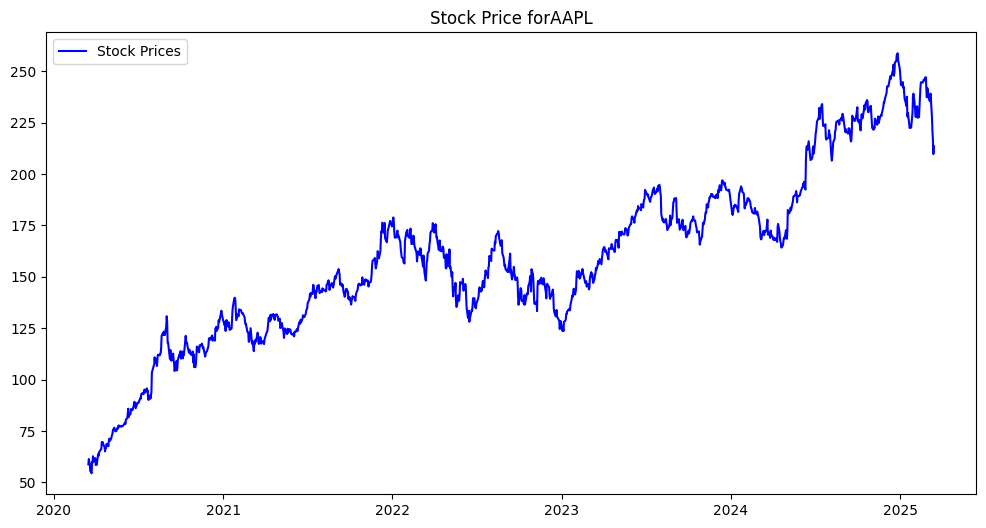

,Date,Open,High,Low,Close,Volume
0,2020-03-16,58.716187,62.873275,58.242963,58.779285,322423600
1,2020-03-17,60.065485,62.516541,57.854679,61.363819,324056000
2,2020-03-18,58.187157,60.669763,57.544055,59.861641,300233600
3,2020-03-19,60.036366,61.358966,58.876360,59.402973,271857200
4,2020-03-20,59.985403,61.113863,55.330821,55.631744,401693200
...,...,...,...,...,...,...
1252,2025-03-10,235.539993,236.160004,224.220001,227.479996,72071200
1253,2025-03-11,223.809998,225.839996,217.449997,220.839996,76137400
1254,2025-03-12,220.139999,221.750000,214.910004,216.979996,62547500
1255,2025-03-13,215.949997,216.839996,208.419998,209.679993,61368300


In [43]:
comp = "AAPL"
data = stock_price_retrive(comp)

if isinstance(data.columns, pd.MultiIndex):
  data.columns = [col[0] for col in data.columns]

data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
data.dropna(inplace=True)
data.reset_index(inplace=True)
data

Bellow we initialize all our feture importances and also drop a level of the dataset

In [44]:
data = add_all_ta_features(
    data, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

print("Total number of columns after adding technical indicators:", len(data.columns))
print("Sample columns:", data.columns.tolist()[:10])

data.dropna(inplace=True)

def classify(open, close):
  data["Target"] = ((close-open) > 0).astype(int)

classify(data['Open'], data['Close'])
data.dropna(inplace=True)

Total number of columns after adding technical indicators: 92
Sample columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi']


We then made a code that sets a columb of data to 1 or 0 depending on if it close or open if bigger, with open being greater setting a value of 0 and close being bigger as a 1.

We made our LSTM model to predict future valus to figure out if the day was over all posative or negative. (pos = close > open, neg = open > close)

We make our training data and normalize that values, and lastly reshape it before we fit it to the LSTM model.

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


n_samples, lookback, n_features = X_train.shape
X_train_reshaped = X_train.reshape(n_samples, lookback * n_features)

n_samples_test = X_test.shape[0]
X_test_reshaped = X_test.reshape(n_samples_test, lookback * n_features)

valid_train_indices = ~np.isnan(y_train)
X_train_reshaped = X_train_reshaped[valid_train_indices]
y_train_cleaned = y_train[valid_train_indices]

valid_test_indices = ~np.isnan(y_test)
X_test_reshaped = X_test_reshaped[valid_test_indices]
y_test_cleaned = y_test[valid_test_indices]

y_train_cleaned = (y_train_cleaned > 0).astype(int)
y_test_cleaned = (y_test_cleaned > 0).astype(int)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_reshaped, y_train_cleaned)

# Calculate baseline accuracy on the original test set
y_pred = rf_clf.predict(X_test_reshaped)
baseline_accuracy = accuracy_score(y_test_cleaned, y_pred)

# Store feature importance results
feature_importances = []

# Shuffle each feature and evaluate the model performance
for i in range(X_test_reshaped.shape[1]):
    # Copy the test set
    X_test_shuffled = X_test_reshaped.copy()

    # Shuffle the current feature column
    np.random.shuffle(X_test_shuffled[:, i])

    # Make predictions using the shuffled data
    y_pred_shuffled = rf_clf.predict(X_test_shuffled)

    # Calculate accuracy after shuffling
    shuffled_accuracy = accuracy_score(y_test_cleaned, y_pred_shuffled)

    # Calculate the drop in accuracy (importance of the feature)
    importance = baseline_accuracy - shuffled_accuracy
    feature_importances.append(importance)

original_feature_names = feature_values.columns

reshaped_feature_names = []
for name in original_feature_names:
    for i in range(lookback):  # Repeat for each timestep in lookback
        reshaped_feature_names.append(f'{name}_t-{lookback - 1 - i}')  # Add timestep suffix

feature_importances_df = pd.DataFrame({
    'feature': reshaped_feature_names,  # Use reshaped feature names
    'importance': feature_importances
})

# Filter out features with importance == 0 and update X_train_reshaped and X_test_reshaped
important_features_df = feature_importances_df[feature_importances_df['importance'] > 0]

# Get indices of important features
important_indices = feature_importances_df[feature_importances_df['importance'] > 0.004].index.to_list()

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]


# Filter train and test sets using the selected indices
X_train = X_train_reshaped[:, important_indices]
X_test = X_test_reshaped[:, important_indices]

# Sort by importance
important_features_df = important_features_df.sort_values(by='importance', ascending=False)

# Plotting the important features
plt.figure(figsize=(12, 18))
plt.barh(important_features_df['feature'], important_features_df['importance'], color='skyblue')
plt.xlabel('Decrease in Accuracy')
plt.title('Feature Importance by Random Shuffling (Accuracy Decrease)')
plt.gca().invert_yaxis()
plt.show()


In [46]:
lookback = 7

feature_values = data.drop(['Date', 'Target'], axis=1)

features = feature_values.values
targets = data['Target'].values

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X = np.array([features_scaled[i-lookback:i] for i in range(lookback, len(features_scaled))])
y = np.array([targets[i] for i in range(lookback, len(features_scaled))])


print("X shape:", X.shape)
print("y shape:", y.shape)
features[2:]

X shape: (1250, 7, 91)
y shape: (1250,)


array([[ 58.18715696,  60.66976261,  57.54405526, ...,  -2.4479868 ,
         -2.47844815,   1.84138935],
       [ 60.0363656 ,  61.35896558,  58.87636012, ...,  -0.76621313,
         -0.76916363,   1.06106724],
       [ 59.98540325,  61.113863  ,  55.33082104, ...,  -6.34855225,
         -6.55902981,  -5.35484741],
       ...,
       [220.13999939, 221.75      , 214.91000366, ...,  -1.74787207,
         -1.76332771, 269.14364327],
       [215.94999695, 216.83999634, 208.41999817, ...,  -3.36436685,
         -3.42226396, 256.7242969 ],
       [211.25      , 213.94999695, 209.58000183, ...,   1.81706074,
          1.80074948, 263.20619403]], shape=(1255, 91))

In [47]:
model = Sequential()
model.add(LSTM(units=64, return_sequences=False, input_shape=(X.shape[1], X.shape[2]), kernel_regularizer=regularizers.l1(0.001)))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid')) # using signmoid as it is better at binary classification

#using Binary Crossentropy as we are testing accuracy for binary values
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 64)                  │          39,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,001 (156.25 KB)

 Trainable params: 40,001 (156.25 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [49]:
history = model.fit(X_train, y_train, epochs=500, batch_size=80, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Epoch 1/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.4855 - loss: 2.2017 - val_accuracy: 0.4240 - val_loss: 2.0499
Epoch 2/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5389 - loss: 1.9815 - val_accuracy: 0.4160 - val_loss: 1.8713
Epoch 3/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5574 - loss: 1.7912 - val_accuracy: 0.4280 - val_loss: 1.7165
Epoch 4/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5821 - loss: 1.6165 - val_accuracy: 0.4120 - val_loss: 1.5785
Epoch 5/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6131 - loss: 1.4665 - val_accuracy: 0.4480 - val_loss: 1.4610
Epoch 6/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5978 - loss: 1.3363 - val_accuracy: 0.4400 - val_loss: 1.3574
Epoch 7/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6216 - loss: 1.2113 - val_accuracy: 0.4480 - val_loss: 1.2790
Epoch 8/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6047 - loss: 1.1203 - val_accuracy: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
[[0.9990784]]


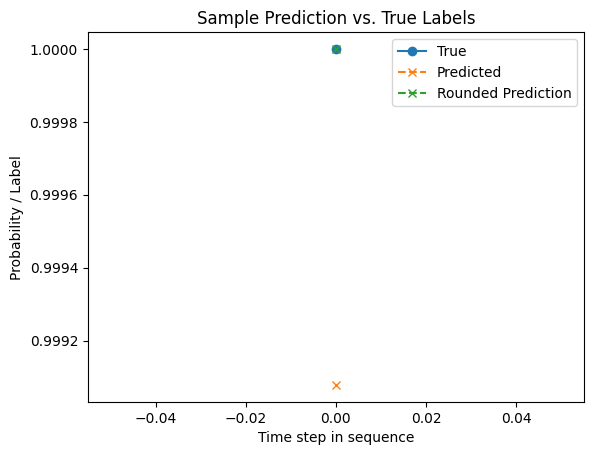

In [50]:
idx = 0
sample_pred1 = model.predict(X_test[idx:idx+1])
sample_true1 = y_test[idx]

print(sample_pred1)

Actual_Predicted1 = sample_pred1.copy()
if(Actual_Predicted1[0] > 0.5):
  Actual_Predicted1[0] = 1
else:
  Actual_Predicted1[0] = 0

plt.plot(sample_true1, 'o-', label='True')
plt.plot( sample_pred1, 'x--', label='Predicted')
plt.plot(Actual_Predicted1, 'x--', label='Rounded Prediction')
plt.xlabel("Time step in sequence")
plt.ylabel("Probability / Label")
plt.title("Sample Prediction vs. True Labels")
plt.legend()
plt.show()

In [51]:
X2 = np.array([features_scaled[i-lookback:i] for i in range(lookback, len(features_scaled) - lookback + 1)])
y2 = np.array([targets[i:i+lookback].reshape(-1, 1) for i in range(lookback, len(features_scaled) - lookback + 1)])

print("New X shape:", X2.shape)
print("New y shape:", y2.shape)

New X shape: (1244, 7, 91)
New y shape: (1244, 7, 1)


In [52]:
new_split = int(0.8 * len(X2))
X_train, X_test = X2[:new_split], X2[new_split:]
y_train, y_test = y2[:new_split], y2[new_split:]

y_train = y_train[:, -1].reshape(-1, 1)
y_test = y_test[:, -1].reshape(-1, 1)

y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

history = model.fit(X_train, y_train, epochs=150, batch_size=80, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Epoch 1/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.4854 - loss: 3.4195 - val_accuracy: 0.4699 - val_loss: 2.4008
Epoch 2/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5819 - loss: 1.7028 - val_accuracy: 0.4699 - val_loss: 1.8810
Epoch 3/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5590 - loss: 1.1700 - val_accuracy: 0.4659 - val_loss: 1.9709
Epoch 4/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6216 - loss: 0.9844 - val_accuracy: 0.4819 - val_loss: 1.5803
Epoch 5/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6343 - loss: 0.9511 - val_accuracy: 0.4498 - val_loss: 1.5517
Epoch 6/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6652 - loss: 0.8521 - val_accuracy: 0.4779 - val_loss: 1.4973
Epoch 7/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6722 - loss: 0.8238 - val_accuracy: 0.4739 - val_loss: 1.4305
Epoch 8/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6860 - loss: 0.8072 - val_accuracy: 0.

We then predict our code to detirmane future (close-Open values), and then plot it.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


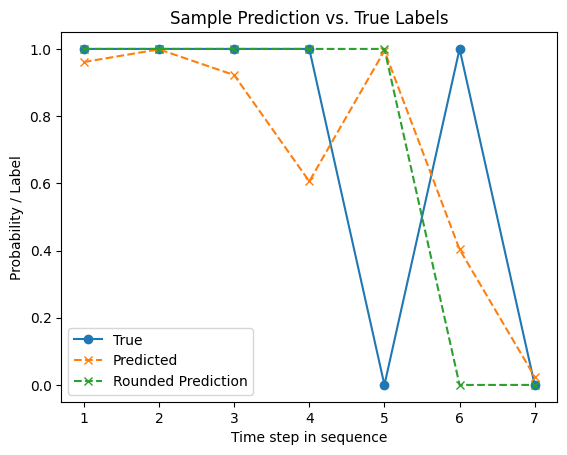

In [53]:
idx = 50
sample_pred = model.predict(X_test[idx:idx+lookback])
sample_true = y_test[idx:idx+lookback]

Actual_Predicted = sample_pred.copy()

for i in range(lookback):
  if(Actual_Predicted[i] > 0.5):
    Actual_Predicted[i] = 1
  else:
    Actual_Predicted[i] = 0

plt.plot(range(1, lookback+1), sample_true, 'o-', label='True')
plt.plot(range(1, lookback+1), sample_pred, 'x--', label='Predicted')
plt.plot(range(1, lookback+1), Actual_Predicted, 'x--', label='Rounded Prediction')
plt.xlabel("Time step in sequence")
plt.ylabel("Probability / Label")
plt.title("Sample Prediction vs. True Labels")
plt.legend()
plt.show()